In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
data['gender'].unique()

array(['female', 'male'], dtype=object)

In [5]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

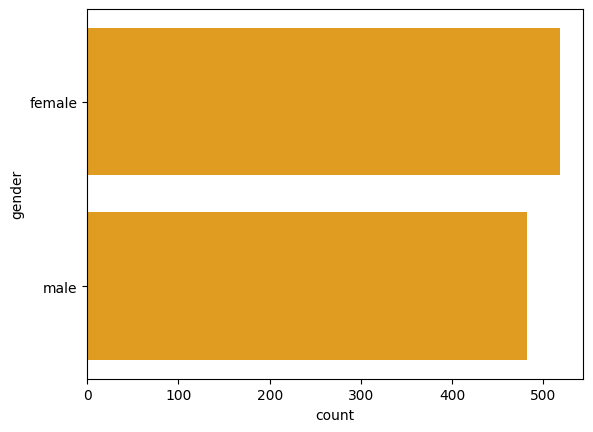

In [6]:
sns.countplot(data['gender'], color='orange')
plt.show()

(array([  0.,  50., 100., 150., 200., 250., 300., 350.]),
 [Text(0.0, 0, '0'),
  Text(50.0, 0, '50'),
  Text(100.0, 0, '100'),
  Text(150.0, 0, '150'),
  Text(200.0, 0, '200'),
  Text(250.0, 0, '250'),
  Text(300.0, 0, '300'),
  Text(350.0, 0, '350')])

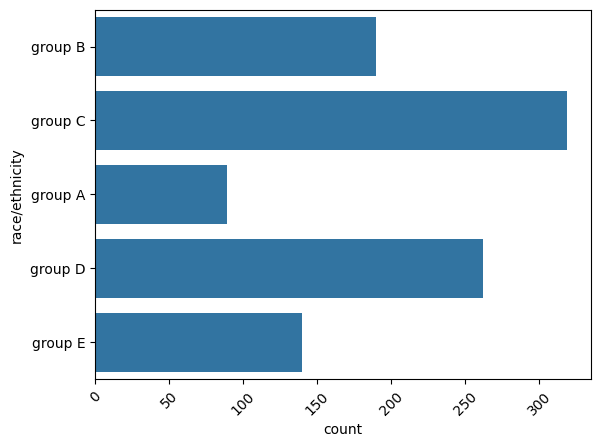

In [7]:
sns.countplot(data['race/ethnicity'])
plt.xticks(rotation=45)

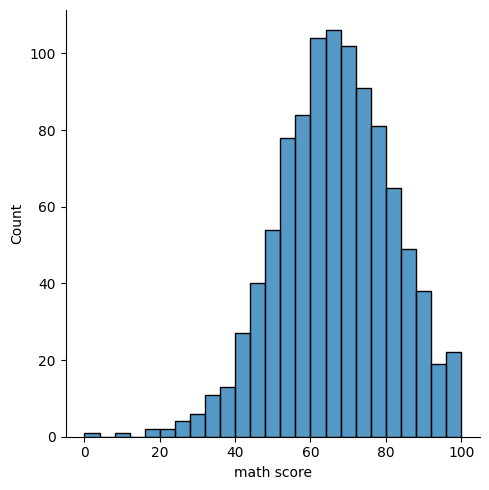

In [8]:
sns.displot(data['math score'])

In [9]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [10]:
gender_math = data.groupby('gender')['math score'].mean()
gender_math

gender
female    63.633205
male      68.728216
Name: math score, dtype: float64

In [11]:
gender_writing = data.groupby("gender")["writing score"].mean()
gender_writing

gender
female    72.467181
male      63.311203
Name: writing score, dtype: float64

In [12]:
gender_reading = data.groupby("gender")["reading score"].mean()
gender_reading

gender
female    72.608108
male      65.473029
Name: reading score, dtype: float64

In [15]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [16]:
data['gender']= data['gender'].map({'male': 0,'female': 1})

In [17]:
data


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,standard,none,72,72,74
1,1,group C,some college,standard,completed,69,90,88
2,1,group B,master's degree,standard,none,90,95,93
3,0,group A,associate's degree,free/reduced,none,47,57,44
4,0,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,standard,completed,88,99,95
996,0,group C,high school,free/reduced,none,62,55,55
997,1,group C,high school,free/reduced,completed,59,71,65
998,1,group D,some college,standard,completed,68,78,77


In [18]:
x = data.drop('gender', axis=1)
y = data['gender']
x.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,group B,bachelor's degree,standard,none,72,72,74
1,group C,some college,standard,completed,69,90,88
2,group B,master's degree,standard,none,90,95,93
3,group A,associate's degree,free/reduced,none,47,57,44
4,group C,some college,standard,none,76,78,75


In [19]:
y.head()

0    1
1    1
2    1
3    0
4    0
Name: gender, dtype: int64

In [21]:
x.columns

Index(['race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [22]:
x_encoded = pd.get_dummies(x)
x_encoded.head()

,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [26]:
from sklearn.preprocessing import MinMaxScaler
from sympy.abc import x

scaler = MinMaxScaler(feature_range=(0, 1))
x_scaled = scaler.fit_transform(x_encoded)
x_scaled[0]


array([0.72      , 0.6626506 , 0.71111111, 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        ])

In [27]:
x_scaled.shape

(1000, 18)

In [28]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 18)
(200, 18)
(800,)
(200,)


In [29]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.fc1 = nn.Linear(18, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 2)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out  

In [30]:
model = ANN()

In [31]:
import torch.nn as nn
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
error = nn.CrossEntropyLoss()

In [32]:
x_train = torch.Tensor(x_train)
x_test = torch.Tensor(x_test)
y_train = torch.Tensor(y_train).type(torch.LongTensor)

In [33]:
epochs = 200

for epoch in range(epochs):
    optimizer.zero_grad()
    
    preds = model(x_train)
    
    loss = error(preds, y_train)
    
    loss.backward()

    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

Epoch: 0, Loss: 0.7172682285308838
Epoch: 10, Loss: 0.6853185296058655
Epoch: 20, Loss: 0.668907642364502
Epoch: 30, Loss: 0.6455811858177185
Epoch: 40, Loss: 0.6129754781723022
Epoch: 50, Loss: 0.5718444585800171
Epoch: 60, Loss: 0.525676965713501
Epoch: 70, Loss: 0.47659727931022644
Epoch: 80, Loss: 0.4241134524345398
Epoch: 90, Loss: 0.37523823976516724
Epoch: 100, Loss: 0.3352859914302826
Epoch: 110, Loss: 0.3036474287509918
Epoch: 120, Loss: 0.27949559688568115
Epoch: 130, Loss: 0.26077425479888916
Epoch: 140, Loss: 0.24639396369457245
Epoch: 150, Loss: 0.2354198396205902
Epoch: 160, Loss: 0.22684554755687714
Epoch: 170, Loss: 0.22040638327598572
Epoch: 180, Loss: 0.21518102288246155
Epoch: 190, Loss: 0.21104812622070312


In [35]:
from sklearn.metrics import accuracy_score
import numpy as np

y_head = model(x_test)
print(y_head[0])

y_pred = torch.max(y_head,-1)[1]
print(y_pred[0])

print("Accuracy of model is ",accuracy_score(y_pred,y_test))

tensor([ 0.7658, -0.6589], grad_fn=<SelectBackward0>)
tensor(0)
Accuracy of model is  0.91
